<a href="https://colab.research.google.com/github/teestar5/lesson00/blob/NeJron/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%97_PRO_%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_%D1%81%D0%BB%D0%BE%D0%B9_(Dense)_%D0%9F%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9D%D0%A1_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание_1. Обучающая, проверочная и тестовая выборки. Переобучение НС

##Задание

Используя модуль **datasets** библиотеки **sklearn**, загрузите базу вин (`.load_wine()`).

Используя шаблон ноутбука, выполните загрузку, подготовку и предобработку данных. Обязательное условие: разделение данных на три выборки осуществляется по шаблону (изменять параметры подготовки данных запрещается)!

Проведите серию экспериментов и добейтесь максимальной точности классификации на тестовой выборке выше 94%.

---

С помощью метода `.summary()` зафиксируйте количество параметров созданной вами нейронной сети.


##Шаблон ноутбука

In [2]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam

# Библиотека для работы с массивами
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from sklearn.datasets import load_wine

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

###Описание базы

1. Датасет состоит из набора данных о винах и их классах.
2. Данные по одному вину хранятся в numpy-массиве `x_data`: (`13` параметров).
3. В датасете `3` класса вин: `y_data`.
4. Количество примеров: `178`.

In [3]:
x_data = load_wine()['data']              # Загрузка набора данных о винах
y_data = load_wine()['target']            # Загрузка классов вин

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


###Подготовка данных
* Категориальное (`one hot encoding`) представление меток
* Разделение данных на три выборки:
  - Обучающую (`x_train, y_train`)
  - Проверочную (`x_val, y_val`)
  - Тестовую (`x_test, y_test`)

In [4]:
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data,
                                                y_data,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 6)
print("Обучающая выборка:")
print(x_train.shape)
print(y_train.shape)
print("Проверочная выборка:")
print(x_val.shape)
print(y_val.shape)
print("Тестовая выборка:")
print(x_test.shape)
print(y_test.shape)

Обучающая выборка:
(144, 13)
(144, 3)
Проверочная выборка:
(16, 13)
(16, 3)
Тестовая выборка:
(18, 13)
(18, 3)


In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Исходные данные
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# Создаем объект MinMaxScaler и применяем его к данным
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Обратное преобразование
original_data = scaler.inverse_transform(normalized_data)

print("Исходные данные:\n", data)
print("Нормализованные данные:\n", normalized_data)
print("Обратное преобразование (MinMaxScaler):\n", original_data)

Исходные данные:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
Нормализованные данные:
 [[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]
Обратное преобразование (MinMaxScaler):
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [6]:
from sklearn.preprocessing import StandardScaler

# Исходные данные
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# Создаем объект StandardScaler и применяем его к данным
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

# Обратное преобразование
original_data = scaler.inverse_transform(standardized_data)

print("Исходные данные:\n", data)
print("Стандартизованные данные:\n", standardized_data)
print("Обратное преобразование (StandardScaler):\n", original_data)

Исходные данные:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
Стандартизованные данные:
 [[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]
Обратное преобразование (StandardScaler):
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


Создание модели

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, input_shape=(13,), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(3, activation='softmax')
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Вывод информации о модели
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,123 (51.26 KB)

 Trainable params: 12,675 (49.51 KB)

 Non-trainable params: 448 (1.75 KB)

Обучение модели

In [8]:
history = model.fit(x_train, y_train,
                     batch_size=16,
                     epochs=150,
                     validation_data=(x_val, y_val),
                     verbose=0)

Оценка на тесте

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n🎯 Точность на тестовой выборке: {test_acc * 100:.2f}%")


🎯 Точность на тестовой выборке: 83.33%


# Задание_2. Сверточные нейронные сети

## Задание

Используя датасет "Пассажиры автобуса", создайте нейронную сеть для решения задачи классификации пассажиров на входящих и выходящих.

Добейтесь точности работы модели выше 90% на проверочной выборке

### Загрузка данных


In [10]:
# загрузка библиотек

# методы для отрисовки изображений
from PIL import Image

# Для отрисовки графиков
import matplotlib.pyplot as plt

# Для генерации случайных чисел
import random

# Библиотека работы с массивами
import numpy as np

# Для работы с файлами
import os

# импортируем модуль для загрузки данных
import gdown

# для разделения выборок
from sklearn.model_selection import train_test_split

# для создания сети
from tensorflow.keras.models import Sequential

# для создания слоев
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# для работы с изображениями
from tensorflow.keras.preprocessing import image

# оптимизатор
from tensorflow.keras.optimizers import Adam

# модуль для отсчета времени
import time

In [11]:
# загрузка датасета, укажем путь к базе в Google Drive, база в виде .zip-архива
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip', None, quiet=True)

# Распакуем архив в директорию 'content/bus'
!unzip -q "bus.zip" -d /content/bus

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/bus/'

# Получение списка папок, находящемуся по адресу в скобках
os.listdir(IMAGE_PATH)

['Входящий', 'Выходящий']

In [12]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 2, метки классов: ['Входящий', 'Выходящий']


In [13]:
# Получения списка файлов для каждого класса

for cls in CLASS_LIST:
    print(cls, ':', os.listdir(f'{IMAGE_PATH}{cls}/'))

Входящий : ['06353.jpg', '04648.jpg', '00641.jpg', '04024.jpg', '01923.jpg', '06198.jpg', '04319.jpg', '05865.jpg', '04051.jpg', '01883.jpg', '03823.jpg', '06448.jpg', '03136.jpg', '02392.jpg', '01350.jpg', '04635.jpg', '04329.jpg', '01900.jpg', '05301.jpg', '04095.jpg', '04566.jpg', '04409.jpg', '04561.jpg', '03732.jpg', '06161.jpg', '03367.jpg', '03214.jpg', '06158.jpg', '05659.jpg', '01445.jpg', '01062.jpg', '01137.jpg', '05536.jpg', '02192.jpg', '01044.jpg', '02108.jpg', '03697.jpg', '03458.jpg', '00264.jpg', '04147.jpg', '02019.jpg', '02425.jpg', '00808.jpg', '03045.jpg', '05872.jpg', '02836.jpg', '03777.jpg', '01890.jpg', '04362.jpg', '03794.jpg', '04020.jpg', '00615.jpg', '01924.jpg', '00710.jpg', '02160.jpg', '02076.jpg', '02127.jpg', '04283.jpg', '04695.jpg', '01577.jpg', '03722.jpg', '02291.jpg', '05539.jpg', '03301.jpg', '06217.jpg', '03021.jpg', '05160.jpg', '00940.jpg', '05181.jpg', '04108.jpg', '05015.jpg', '02640.jpg', '00159.jpg', '01184.jpg', '05300.jpg', '03780.jpg', 

Отобразим визуально для примера по одному изображению из каждого класса (при помощи функции `.imshow()` из модуля `matplotlib.pyplot`):

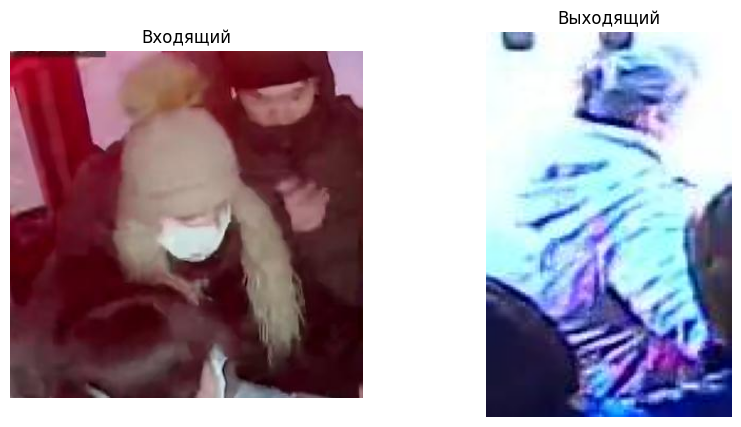

In [14]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(10, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):

    # Формирование пути к папке содержимого класса
    car_path = f'{IMAGE_PATH}{CLASS_LIST[i]}/'

    # Выбор случайного фото из i-го класса
    img_path = car_path + random.choice(os.listdir(car_path))

    # Отображение фотографии (подробнее будет объяснено далее)
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

In [15]:
data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} фото')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print()
print('Общий размер базы для обучения:', len(data_labels))

Размер класса Входящий составляет 6485 фото
Размер класса Выходящий составляет 2596 фото

Общий размер базы для обучения: 9081


Подготовка данных

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Задаем параметры
IMG_SIZE = 128  # Размер изображений
BATCH_SIZE = 32
NUM_CLASSES = CLASS_COUNT  # 2 класса

# Подготовка данных
X = []  # Список изображений
y = []  # Список меток

for i in range(len(data_files)):
    # Загружаем изображение и изменяем его размер
    img = load_img(data_files[i], target_size=(IMG_SIZE, IMG_SIZE))
    img_arr = img_to_array(img) / 255.0  # Нормализация
    X.append(img_arr)
    y.append(data_labels[i])

# Преобразуем в numpy-массивы
X = np.array(X)
y = np.array(y)

# One-hot кодирование меток
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=NUM_CLASSES)

print("Форма X:", X.shape)
print("Форма y:", y.shape)

Форма X: (9081, 128, 128, 3)
Форма y: (9081, 2)


Разделение выборки

In [17]:
# Разделение на обучающую и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Обучающая выборка:", X_train.shape, y_train.shape)
print("Проверочная выборка:", X_val.shape, y_val.shape)

Обучающая выборка: (7264, 128, 128, 3) (7264, 2)
Проверочная выборка: (1817, 128, 128, 3) (1817, 2)


Архитектура сети

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    # Первый сверточный слой
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Второй сверточный слой
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Третий сверточный слой
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Четвертый сверточный слой
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Выпрямление и полносвязные слои
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Вывод информации о модели
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,110,466 (19.49 MB)

 Trainable params: 5,109,506 (19.49 MB)

 Non-trainable params: 960 (3.75 KB)

Обучение модели

In [19]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/30
227/227 - 395s - 2s/step - accuracy: 0.8073 - loss: 0.7411 - val_accuracy: 0.7595 - val_loss: 0.5790
Epoch 2/30
227/227 - 386s - 2s/step - accuracy: 0.9155 - loss: 0.2085 - val_accuracy: 0.8387 - val_loss: 0.3375
Epoch 3/30
227/227 - 382s - 2s/step - accuracy: 0.9540 - loss: 0.1149 - val_accuracy: 0.9521 - val_loss: 0.1168
Epoch 4/30
227/227 - 387s - 2s/step - accuracy: 0.9599 - loss: 0.1037 - val_accuracy: 0.9532 - val_loss: 0.1362
Epoch 5/30
227/227 - 437s - 2s/step - accuracy: 0.9683 - loss: 0.0898 - val_accuracy: 0.9389 - val_loss: 0.1685
Epoch 6/30
227/227 - 381s - 2s/step - accuracy: 0.9710 - loss: 0.0800 - val_accuracy: 0.9576 - val_loss: 0.1191
Epoch 7/30
227/227 - 382s - 2s/step - accuracy: 0.9771 - loss: 0.0635 - val_accuracy: 0.9879 - val_loss: 0.0343
Epoch 8/30
227/227 - 382s - 2s/step - accuracy: 0.9871 - loss: 0.0362 - val_accuracy: 0.9802 - val_loss: 0.0622
Epoch 9/30
227/227 - 442s - 2s/step - accuracy: 0.9821 - loss: 0.0535 - val_accuracy: 0.9378 - val_loss:

Оценка точности

In [20]:
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f'\n🎯 Точность на проверочной выборке: {val_acc * 100:.2f}%')


🎯 Точность на проверочной выборке: 99.61%
